<a href="https://colab.research.google.com/github/yukomath/Project_1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 : Business Understanding

## Brief Description
This project uses data from the **Stack Overflow Developer Survey 2025** to analyze and predict software developers’ salaries based on their country,  education level, experience, and technical skills. The goal is to provide insights that help **job seekers understand their market value** and **make informed career decisions**.

---

## Business Objective
- To identify the key factors that influence developer salaries globally.  
- To build predictive models that estimate expected salaries based on individual profiles.  
- To help job seekers and employers make data-driven decisions about compensation and skill development.

---

## Current Situation
- The global tech job market is highly competitive, and compensation varies widely depending on country, education level, experience, and skill set.  
- Stack Overflow’s annual developer survey provides a rich dataset capturing these variations.  
- By analyzing this data, we can identify **which skills, experiences, education level or locations command higher salaries.**

---

## Analytic Goals
1. Explore relationships between experience, education level, technical skills, and salary.  
2. Build regression models (Linear Regression, Random Forest, LightGBM) to predict developer salaries.  
3. Use SHAP analysis to interpret model outputs and identify the most influential factors.  
4. Allow users to input their own profiles and compare expected salaries across countries.




---

## Key Questions

### Question 1
**What salary can job seekers expect based on their experience and skills?**  
→ Helps job seekers understand their market value and career progression potential.

### Question 2
**How do different programming languages or technologies impact salary expectations?**  
→ Guides job seekers on which skills are most valuable to develop.

### Question 3
**What is the average salary for job seekers in different countries or regions?**  
→ Supports relocation or remote work decisions based on geographic pay differences.

### Question 4
**How does education level affect salary potential for job seekers?**  
→ Helps evaluate the value of further education or certifications.




# Section 2: Data Understanding

## 2.1 Data Source

The dataset used in this project is [the Stack Overflow Developer Survey 2025](https://survey.stackoverflow.co/), which collects responses from software developers worldwide. This dataset provides a comprehensive view of global developer demographics, skills, and compensation.

## 2.2 Data Loading and Initial Exploration



### Preparation for Google Colab (Only Once)

Mounts Google Drive at /content/drive for file access in Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data was loaded from Google Drive in CSV format:


In [2]:
# import library
import pandas as pd
import numpy as np

# loading csv file from my google drive
path = '/content/drive/MyDrive/ColabProjects/StackOverflow2025/survey_results_public_2025.csv'
df = pd.read_csv(path, encoding='utf-8-sig')

# Check Data
print("Data loaded successfully")
print("Rows, Columns:", df.shape)



Data loaded successfully
Rows, Columns: (49123, 170)


## 2.3 Selected Variables for Analysis

We only focus on the following variables because they reflect the key factors that influence developer compensation:

- Country

- Education level (EdLevel)

- Years of coding experience (YearsCode)

- Employment type

- Programming languages used

- AI tools usage

- Target variable: Annual salary (ConvertedCompYearly)

These variables capture developers’ background, experience, and technical skills — all of which are essential for understanding global salary patterns and building accurate prediction models.

In [3]:
# Select relevant columns in the data

cols = [
    "Country",
    "EdLevel",
    "WorkExp",                # professional work experience years
    "YearsCode",              # coding experience years
    "LanguageHaveWorkedWith", # languages used
    "AISelect",               # AI tools usage indicator
    "ConvertedCompYearly"     # salary (target)
]
df = df[cols].copy()

## 2.4 Data Structure and Variable Types

After selecting the relevant columns, the dataset contains a mix of numerical, categorical, and multi-label variables. Understanding the structure of each variable is essential for choosing appropriate preprocessing and modeling techniques.

### Variable Types Overview

| Variable | Description | Type | Notes |
|---------|-------------|------|-------|
| **Country** | Respondent’s country of residence | Categorical | High-cardinality categorical variable |
| **EdLevel** | Highest level of education achieved | Categorical | Contains multiple education formats and wording variations |
| **WorkExp** | Years of professional coding experience | Numerical (sometimes string) | Requires cleaning because some values are ranges or text (e.g., "Less than 1 year") |
| **YearsCode** | Years of coding experience (including non-professional) | Numerical (sometimes string) | Similar cleaning needed as WorkExp |
| **LanguageHaveWorkedWith** | Programming languages the respondent has worked with | Multi-label categorical | Contains languages in a semicolon-separated format |
| **AISelect** | Whether respondents use AI tools | Categorical / Binary | May contain multiple selections |
| **ConvertedCompYearly** | Annual salary in USD | Numerical | Target variable; contains outliers and missing values |

### Key Points

- Categorical variables require encoding before modeling.  
- Numeric variables require cleaning and conversion.  
- Multi-label variables (like programming languages) will be expanded using multi-hot encoding.  
- The target variable may contain extreme outliers that need attention during preprocessing.


In [4]:
# Preview a few rows
df.head()

,Country,EdLevel,WorkExp,YearsCode,LanguageHaveWorkedWith,AISelect,ConvertedCompYearly
0,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,Bash/Shell (all shells);Dart;SQL,"Yes, I use AI tools monthly or infrequently",61256.0
1,Netherlands,"Associate degree (A.A., A.S., etc.)",2.0,10.0,Java,"Yes, I use AI tools weekly",104413.0
2,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,Dart;HTML/CSS;JavaScript;TypeScript,"Yes, I use AI tools daily",53061.0
3,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,Java;Kotlin;SQL,"Yes, I use AI tools weekly",36197.0
4,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,"Yes, I use AI tools weekly",60000.0


In [5]:
# Check data types of all selected columns
print("=== Data Types ===")
display(df.dtypes.to_frame(name="DataType"))

print("\n=== DataFrame Info ===")
df.info()


=== Data Types ===


,DataType
Country,object
EdLevel,object
WorkExp,float64
YearsCode,float64
LanguageHaveWorkedWith,object
AISelect,object
ConvertedCompYearly,float64



=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 35402 non-null  object 
 1   EdLevel                 48087 non-null  object 
 2   WorkExp                 42844 non-null  float64
 3   YearsCode               43000 non-null  float64
 4   LanguageHaveWorkedWith  31643 non-null  object 
 5   AISelect                33686 non-null  object 
 6   ConvertedCompYearly     23928 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.6+ MB


### Summary

The dataset contains three types of variables:

| Type                        | Variables                               | Notes                                                       |
| --------------------------- | --------------------------------------- | ----------------------------------------------------------- |
| **Numerical**               | WorkExp, YearsCode, ConvertedCompYearly | Include strings like “Less than 1 year”, require conversion |
| **Categorical**             | Country, EdLevel, AISelect              | Need encoding later                                         |
| **Multi-label categorical** | LanguageHaveWorkedWith                  | Semicolon-separated values → multi-hot encoding needed      |


## 2.5 Data Quality Issues

This section identifies data quality problems that must be addressed before modeling.

### 1. Missing Values

Common missing fields:

EdLevel (education level), WorkExp, LanguageHaveWorkedWith,AISelect, ConvertedCompYearly (salary)

→ Missing values will be handled in Section 3 (Data Preparation) using:

-- Filling categorical N/A with “Unknown”

-- Filling YearsCode with median

-- Dropping rows with missing salary


### 2. Inconsistent Formats

Some numeric fields are not numeric:

“Less than 1 year”

“More than 50 years”

“3-5 years”

→ These require conversion to numeric during preprocessing.


### 3. Multi-label Values

LanguageHaveWorkedWith contains values like:

Python;JavaScript;SQL


→ Must be expanded into multi-hot encoded columns.

### 4. Outliers

Salary contains extreme values (e.g., $0, $1, $1,000,000+).

→ We will filter data to a reasonable range (e.g., 5,000–500,000 USD).

## 2.6 Initial Finding

Here we perform basic exploratory analysis before data cleaning.

### 2.6.1. Number of Countries
The dataset includes developers from 177 unique countries, reflecting a wide geographic coverage.

In [6]:
print("Number of unique countries:", df["Country"].nunique())


Number of unique countries: 177


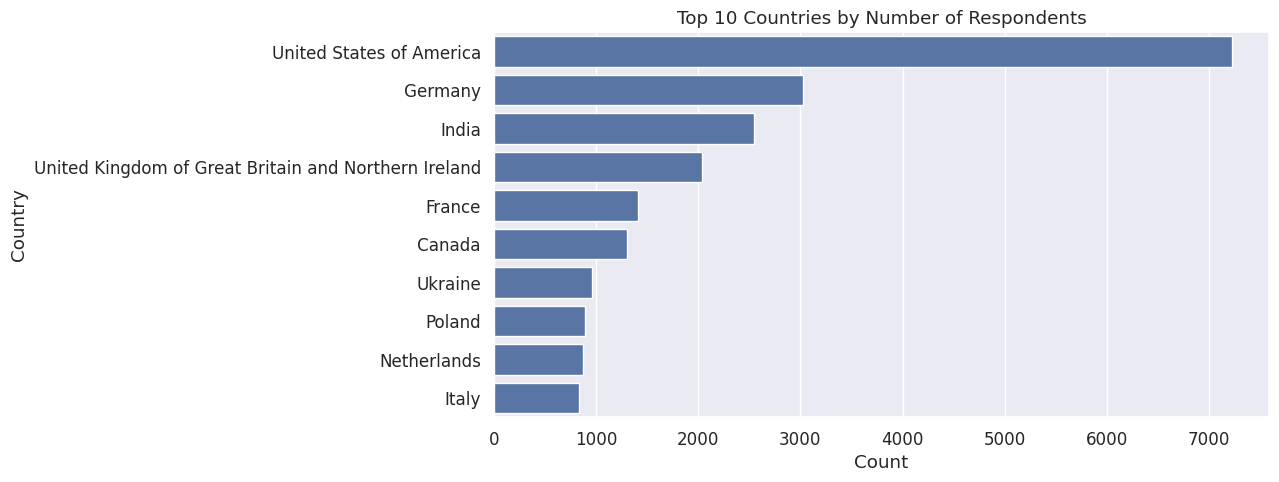

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set(font_scale=1.1)

# --------------------------------------
# Top 10 Countries
# --------------------------------------
country_counts = df["Country"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 Countries by Number of Respondents")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

### 2.6.2. Most Frequent Programming Languages

The most commonly used programming languages are dominated by Python, JavaScript, and SQL, indicating their widespread adoption among developers.

In [8]:
# Split multi-label languages
language_series = (
    df["LanguageHaveWorkedWith"]
    .dropna()
    .str.split(";", expand=True)
    .stack()
)

top_languages = language_series.value_counts().head(10)

print("Top 10 most used programming languages:")
display(top_languages)


Top 10 most used programming languages:


,count
JavaScript,20986
HTML/CSS,19681
SQL,18617
Python,18388
Bash/Shell (all shells),15486
TypeScript,13852
Java,9344
C#,8845
C++,7479
PowerShell,7366


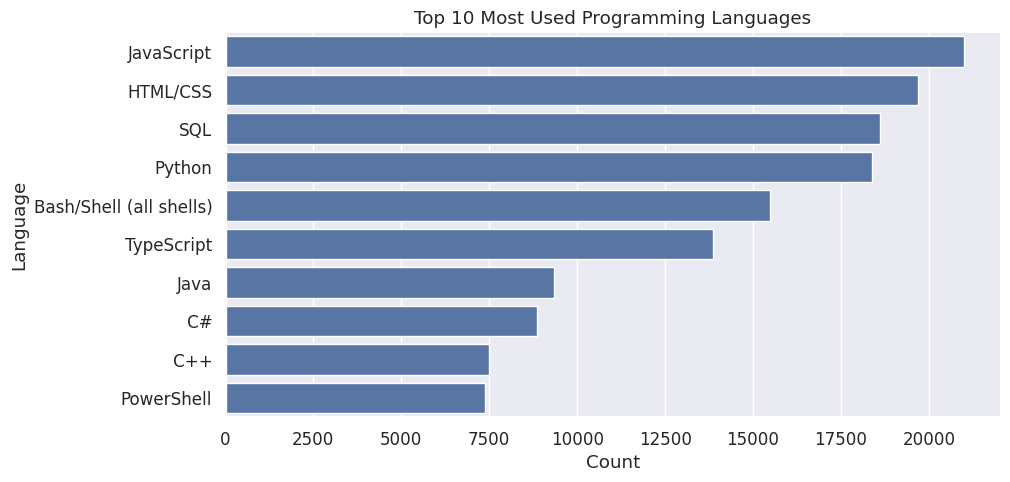

In [9]:
# --------------------------------------
# 2. Top 10 Programming Languages
# --------------------------------------
language_series = (
    df["LanguageHaveWorkedWith"]
    .dropna()
    .str.split(";", expand=True)
    .stack()
)

top_languages = language_series.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title("Top 10 Most Used Programming Languages")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()

### 2.6.3. Salary Basic Statistics

- The annual salary (ConvertedCompYearly) varies widely, ranging from very low to extremely high values (outliers above $1,000,000).

- Most developers earn between $20,000 and $150,000 USD per year, with the distribution skewed to the right due to a small number of very high salaries.

- This long-tailed distribution suggests that while typical salaries are moderate, a few developers earn exceptionally high compensation.

- Visual inspection of the histogram (with outliers removed or log-transformed) shows a clear peak around the median salary and a gradual decline toward higher salaries.

In [10]:
print("Salary Statistics:")
display(df["ConvertedCompYearly"].describe())


Salary Statistics:


,ConvertedCompYearly
count,2.392800e+04
mean,1.017916e+05
std,4.619345e+05
min,1.000000e+00
25%,3.817100e+04
50%,7.538350e+04
75%,1.206302e+05
max,5.000000e+07


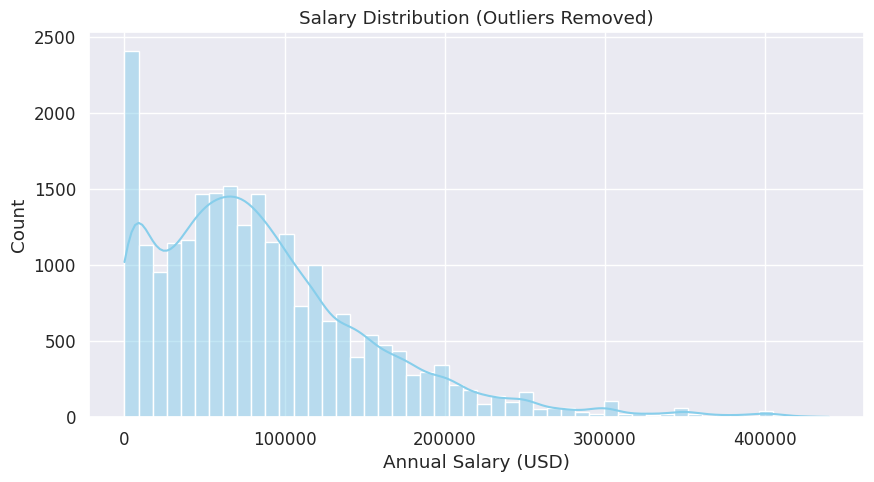

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data: salary column
salary = df["ConvertedCompYearly"]

# Remove outliers (top 1%)
salary_clean = salary[salary < salary.quantile(0.99)]

# Set plot style
plt.style.use('default')
sns.set(font_scale=1.1)

# --------------------------------------
# Histogram (normal scale)
# --------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(salary_clean, bins=50, kde=True, color='skyblue')
plt.title("Salary Distribution (Outliers Removed)")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Count")
plt.show()



### 2.6.4. Experience Distribution

YearsCode (total coding experience) also exhibits a wide range, with many developers clustered around 3–10 years of experience.

A smaller number of developers have very high experience (20+ years), which can influence salary predictions.

In [12]:
print("YearsCode (Raw) Statistics:")
display(df["YearsCode"].describe())


YearsCode (Raw) Statistics:


,YearsCode
count,43000.000000
mean,16.575256
std,11.789269
min,1.000000
25%,8.000000
50%,14.000000
75%,24.000000
max,100.000000


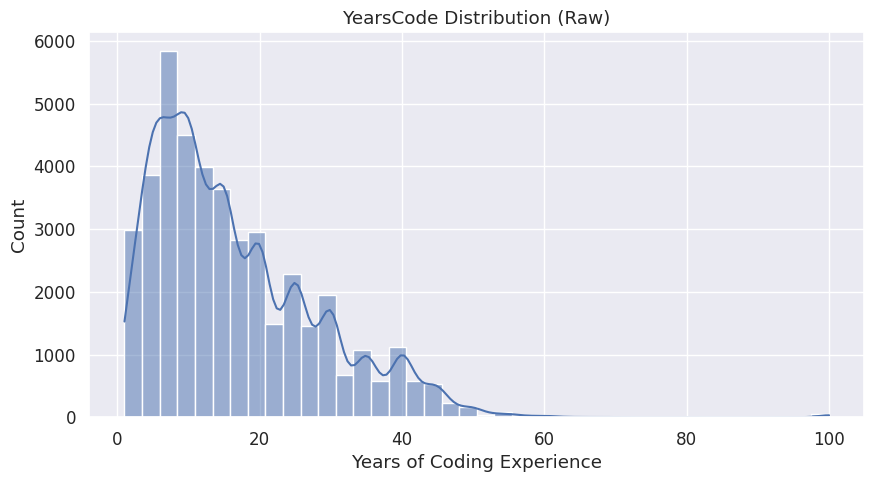

In [13]:
# --------------------------------------
# YearsCode Distribution
# --------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["YearsCode"], bins=40, kde=True)
plt.title("YearsCode Distribution (Raw)")
plt.xlabel("Years of Coding Experience")
plt.show()


# Section 3: Data Preparation




In this section, we clean and preprocess the dataset to make it ready for modeling.  
The main steps are:

1. **Handling Missing Values**  
   - Fill missing categorical values (`Country`, `EdLevel`, `AISelect`) with `"Unknown"`.  
   - Fill missing numerical values (`YearsCode`, `WorkExp`) with the median.  
   - Drop rows with missing target variable (`ConvertedCompYearly`).  

2. **Multi-label Encoding**  
   - Convert `LanguageHaveWorkedWith` (semicolon-separated programming languages) into multi-hot encoded binary columns.  

3. **One-hot Encoding for Categorical Columns**  
   - Convert remaining categorical columns to numeric using one-hot encoding.  

4. **Outlier Handling**  
   - Filter `ConvertedCompYearly` to a reasonable range (e.g. $5,000-$500,000).  

5. **Replace Special Characters in Column Names**  
   - LightGBM does not support special characters in column names, so replace them with underscores.


In [14]:
# --------------------------------------
# Step 1: Handling Missing Values
# --------------------------------------
categorical_cols = ["Country", "EdLevel", "AISelect"]
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

# Fill missing numerical values
median_yearscode = pd.to_numeric(df["YearsCode"], errors='coerce').median()
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce').fillna(median_yearscode)

# Convert WorkExp to numeric and fill remaining NaN
def convert_experience(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        value = value.strip().lower()
        if value == "less than 1 year":
            return 0.5
        elif value == "more than 50 years":
            return 50
        elif "-" in value:
            parts = value.split("-")
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except:
                return np.nan
        else:
            try:
                return float(value)
            except:
                return np.nan
    return value

df["WorkExp"] = df["WorkExp"].apply(convert_experience)
df["WorkExp"] = df["WorkExp"].fillna(df["WorkExp"].median())

# Drop rows with missing target
df = df.dropna(subset=["ConvertedCompYearly"])

# --------------------------------------
# Step 2: Multi-label Encoding for Programming Languages
# --------------------------------------
languages_series = df["LanguageHaveWorkedWith"].dropna().str.split(";", expand=True).stack()
unique_languages = languages_series.unique()
multi_hot_df = pd.DataFrame(0, index=df.index, columns=unique_languages)

for i, langs in df["LanguageHaveWorkedWith"].dropna().items():
    for lang in langs.split(";"):
        multi_hot_df.at[i, lang] = 1

df = pd.concat([df, multi_hot_df], axis=1)
df.drop("LanguageHaveWorkedWith", axis=1, inplace=True)

# --------------------------------------
# Step 3: One-hot Encoding for Categorical Columns
# --------------------------------------
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --------------------------------------
# Step 4: Outlier Handling
# --------------------------------------
min_salary = 5000
max_salary = 500000
df = df[(df["ConvertedCompYearly"] >= min_salary) &
        (df["ConvertedCompYearly"] <= max_salary)]

# --------------------------------------
# Step 5: Replace Special Characters in Column Names
# --------------------------------------
df.columns = df.columns.str.replace(r"[^A-Za-z0-9_]", "_", regex=True)

# --------------------------------------
# Check the first few rows and datatypes
# --------------------------------------
print("Sample data after full preprocessing:")
display(df.head())
print("Data types after preprocessing:")
display(df.dtypes)


Sample data after full preprocessing:


,WorkExp,YearsCode,ConvertedCompYearly,Bash_Shell__all_shells_,Dart,SQL,Java,HTML_CSS,JavaScript,TypeScript,...,EdLevel_Primary_elementary_school,EdLevel_Professional_degree__JD__MD__Ph_D__Ed_D__etc__,EdLevel_Secondary_school__e_g__American_high_school__German_Realschule_or_Gymnasium__etc__,EdLevel_Some_college_university_study_without_earning_a_degree,EdLevel_Unknown,AISelect_No__but_I_plan_to_soon,AISelect_Unknown,AISelect_Yes__I_use_AI_tools_daily,AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,AISelect_Yes__I_use_AI_tools_weekly
0,8.0,14.0,61256.0,1,1,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,2.0,10.0,104413.0,0,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,10.0,12.0,53061.0,0,1,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
3,4.0,5.0,36197.0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,21.0,22.0,60000.0,0,0,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True


Data types after preprocessing:


,0
WorkExp,float64
YearsCode,float64
ConvertedCompYearly,float64
Bash_Shell__all_shells_,int64
Dart,int64
...,...
AISelect_No__but_I_plan_to_soon,bool
AISelect_Unknown,bool
AISelect_Yes__I_use_AI_tools_daily,bool
AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,bool


In [15]:
# Check data types of all columns
print("=== Data Types ===")
display(df.dtypes.to_frame(name="DataType"))


=== Data Types ===


,DataType
WorkExp,float64
YearsCode,float64
ConvertedCompYearly,float64
Bash_Shell__all_shells_,int64
Dart,int64
...,...
AISelect_No__but_I_plan_to_soon,bool
AISelect_Unknown,bool
AISelect_Yes__I_use_AI_tools_daily,bool
AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,bool


# Section 4: Data Modeling

## 4.1. Train/Test Split

We split the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

- Features (X): Predictor variables -
"Country", "EdLevel", "WorkExp", "YearsCode", "LanguageHaveWorkedWith", "AISelect","ConvertedCompYearly"- influencing salary.

- Target (y): ConvertedCompYearly (annual salary).

- Random state: Ensures reproducible splits.

This prepares the data for modeling with Linear Regression, Random Forest, or LightGBM.

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import numpy as np

# --------------------------------------
# 1. Train/Test Split
# --------------------------------------

# Define features (X) and target (y)
X = df.drop("ConvertedCompYearly", axis=1)
y = df["ConvertedCompYearly"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4.2. Model Training: Linear Regression, Random Forest, LightGBM

Three regression models are trained:

- **Linear Regression**: A simple baseline model that assumes a linear relationship between features and salary.

- **Random Forest**: A powerful ensemble tree-based model that captures nonlinear patterns and interactions.

- **LightGBM**: A gradient boosting model known for high accuracy and efficiency, especially with high-dimensional data like ours (221 features).

Install required libraries for modeling and model interpretation.
LightGBM is used for gradient boosting regression and SHAP is used to interpret feature importance.

In [31]:
# Install dependencies (only once)
!pip install lightgbm shap -q
!pip install lightgbm -q

Train a Linear Regression model using the training dataset.

In [18]:
# ---- Linear Regression ----
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

Train a Random Forest model to capture non-linear relationships using multiple decision trees.


In [20]:
# ---- Random Forest ----
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Train a LightGBM model optimized for handling large feature sets efficiently.

In [32]:
# ---- LightGBM ----

lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 17636, number of used features: 120
[LightGBM] [Info] Start training from score 95267.523985


LGBMRegressor(learning_rate=0.05, n_estimators=1000, random_state=42)

## 4.3. Model Evaluation (R², MAE, RMSE)

Before evaluating model performance, we first generate predictions on the test dataset using each trained model. These predicted values will be compared with the actual salaries to compute accuracy metrics.

In [33]:
# --------------------------------------
# Predictions (must be done before evaluation)
# --------------------------------------

# Linear Regression prediction
lr_pred = lr_model.predict(X_test)

# Random Forest prediction
rf_pred = rf_model.predict(X_test)

# LightGBM prediction
lgb_pred = lgb_model.predict(X_test)

We evaluate each model using common regression metrics: R² to measure explanatory power, MAE to capture average error, and RMSE to assess the magnitude of large errors. These metrics help compare the overall performance of the models.

In [34]:
# ===== Linear Regression =====

lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred) ** 0.5

print("\n=== Linear Regression ===")
print("R²:", round(lr_r2, 4))
print("MAE:", round(lr_mae, 2))
print("RMSE:", round(lr_rmse, 2))


# ===== Random Forest =====


rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5

print("\n=== Random Forest ===")
print("R²:", round(rf_r2, 4))
print("MAE:", round(rf_mae, 2))
print("RMSE:", round(rf_rmse, 2))


# ===== LightGBM =====

lgb_r2 = r2_score(y_test, lgb_pred)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_rmse = mean_squared_error(y_test, lgb_pred) ** 0.5

print("\n=== LightGBM ===")
print("R²:", round(lgb_r2, 4))
print("MAE:", round(lgb_mae, 2))
print("RMSE:", round(lgb_rmse, 2))


=== Linear Regression ===
R²: 0.4406
MAE: 34280.06
RMSE: 51777.82

=== Random Forest ===
R²: 0.4267
MAE: 34641.39
RMSE: 52417.33

=== LightGBM ===
R²: 0.4738
MAE: 33236.76
RMSE: 50217.67


The results show that LightGBM delivers the best performance among the three models.
It achieves the highest R² (0.4738), meaning it explains the largest portion of variance in annual salary.
LightGBM also produces the lowest MAE and RMSE, indicating more accurate predictions and smaller average errors.

Linear Regression and Random Forest perform similarly, with Random Forest offering slightly lower error than Linear Regression but also having a lower R² score.
Overall, the boosting-based LightGBM model captures complex patterns in the data more effectively than the other techniques.

## 5. Feature Importance / SHAP

In this section, we analyze the importance of each feature in predicting developer salaries using SHAP (SHapley Additive exPlanations). Since LightGBM achieved the best performance among the three models, we focus the SHAP analysis exclusively on this model. SHAP provides an interpretable measure of how each variable contributes to individual predictions and overall model behavior. By visualizing SHAP values, we can identify which factors—such as experience, education, country, or programming languages—have the greatest impact on salaries.

In [38]:
import shap

# Create a TreeExplainer specifically for LightGBM
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)


Show Top 10 features by mean absolute SHAP.

In [39]:
import pandas as pd
import numpy as np

# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Create a DataFrame for easier sorting and display
shap_df = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanAbsSHAP": mean_abs_shap
})

# Sort by descending order and take top 10
top10_shap = shap_df.sort_values(by="MeanAbsSHAP", ascending=False).head(10)
print("Top 10 features by mean absolute SHAP value:")
display(top10_shap)


Top 10 features by mean absolute SHAP value:


,Feature,MeanAbsSHAP
199,Country_United_States_of_America,29072.739933
0,WorkExp,12459.999100
1,YearsCode,9059.018777
217,AISelect_Yes__I_use_AI_tools_daily,4038.958298
197,Country_United_Kingdom_of_Great_Britain_and_No...,3725.814019
29,PHP,3641.616918
6,HTML_CSS,3498.270720
32,Go,3398.132596
208,EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...,3276.090361
8,TypeScript,2952.520749


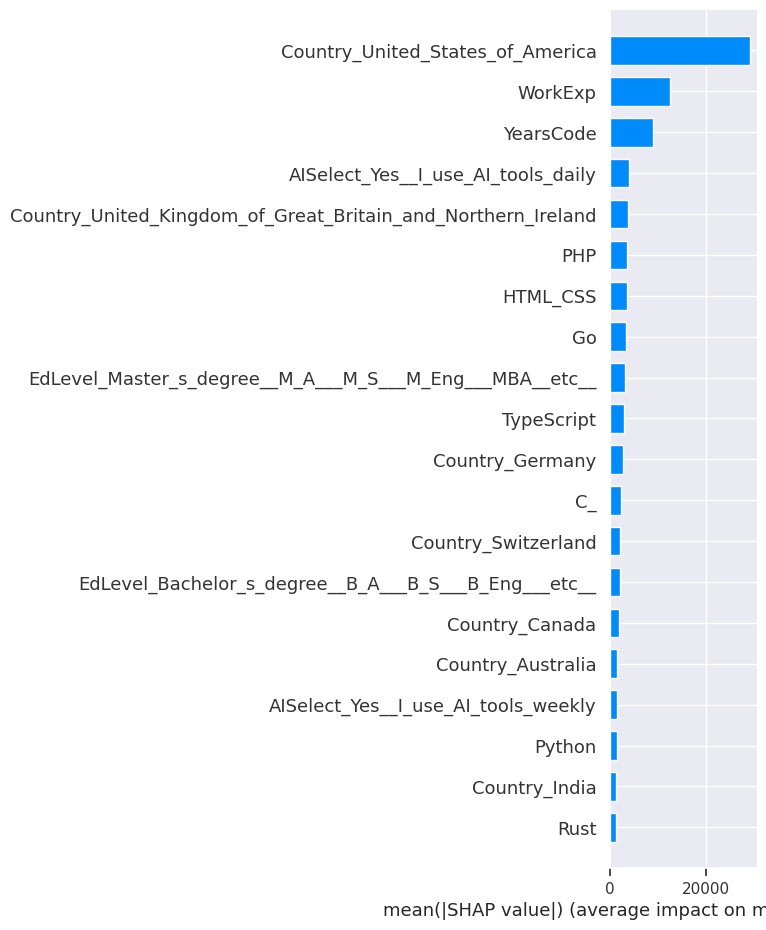

In [41]:
# Summary plot (bar chart)
shap.summary_plot(shap_values, X_test, plot_type="bar")



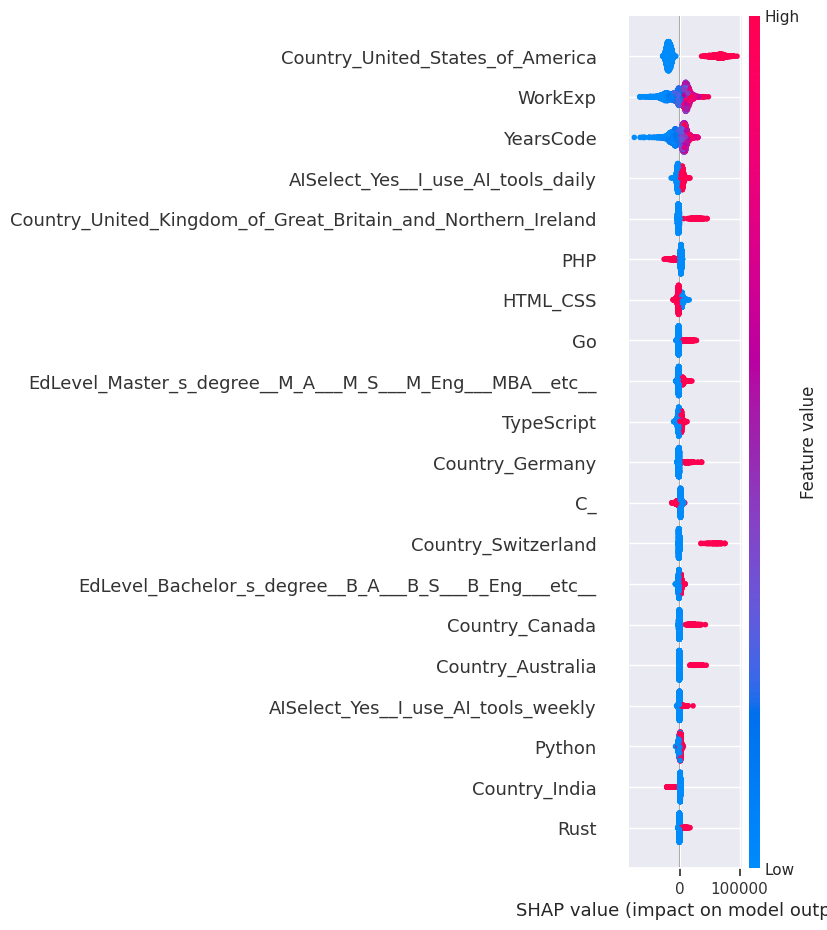

In [42]:
# Summary plot (detailed)
shap.summary_plot(shap_values, X_test)

# Optional: single prediction force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


How to Read a SHAP Plot

X-axis (SHAP value):
Represents how each feature influences the predicted salary.

Positive values → push the prediction up (increase salary)

Negative values → push the prediction down (decrease salary)

Y-axis (Features):
Features are listed in order of importance (from top to bottom).

Color (Feature value):
Indicates the actual value of the feature.

Red = High feature value

Blue = Low feature value

## Interpretation of SHAP Analysis Results

The SHAP analysis highlights the features that have the greatest impact on developer salaries. The most influential factor is the country of residence. Being based in **the United States**, for example, has a significantly positive effect on salary compared to other factors. The next most important features are **years of professional experience **(WorkExp) and **years of coding experience** (YearsCode), indicating that more experienced developers can expect higher compensation.

Additionally, **using AI tools** on a daily basis contributes positively to salary, suggesting that proficiency with new technologies and tools can increase market value. Regarding programming languages, skills in **PHP, HTML/CSS, Go, and TypeScript** also have a measurable impact on salaries, meaning that mastering certain languages can enhance career and compensation prospects. Higher educational attainment, such as a master’s degree, also provides a positive effect.

From these results, job seekers can strategically increase their market value by focusing on a combination of location, experience, technical skills, and education. For instance, to target a higher salary, individuals may consider which languages or technologies to master, accumulate relevant experience, or even consider relocation to regions with higher pay levels.

# Section 5: Evaluate the Results

## Question 1: What salary can job seekers expect based on their experience and skills?

Based on our models, years of professional experience (WorkExp) and total coding experience (YearsCode) are among the most influential factors in determining salary. The SHAP analysis for LightGBM shows that higher experience consistently increases predicted salaries.

- Job seekers with 5–10 years of experience can generally expect mid-range salaries.

- Those with 15+ years of experience see a significant increase in predicted compensation.


##Question 2: How do different programming languages or technologies impact salary expectations?

Our SHAP results reveal that specific programming languages influence salary differently.

- Languages like PHP, Go, TypeScript, and HTML/CSS show noticeable contributions to predicted salaries.

- Developers proficient in languages that are in high demand can expect a higher salary premium.
This analysis guides job seekers to focus on acquiring or strengthening skills in languages and technologies that have the highest market impact.

## Question 3: What is the average salary for job seekers in different countries or regions?

The SHAP analysis highlights that country of residence has a strong impact on salary predictions.

- For example, being in the United States or the United Kingdom significantly increases predicted salaries compared to many other regions.

- This information helps developers make informed decisions about relocation or remote work opportunities, targeting regions with higher compensation for their skill set.


## **Example: Salary Predictions Across Countries for a Sample Profile**

Using this LightGBM model, we will predict the expected salaries for a job seeker with approximately 1 year of professional experience, 1 year of coding experience, a PhD degree, who uses AI tools weekly and is proficient in Python, for the countries of Germany, Japan, Canada and Italy, where they wish to relocate for work.

In [52]:
import pandas as pd

# Job seeker profile
# Define the candidate's characteristics: 1 year professional experience, 1 year coding experience,
# PhD education, AI usage weekly, and Python as the programming language
profile = {
    "WorkExp": 1,                # Years of professional experience
    "YearsCode": 1,              # Total years of coding experience
    "EdLevel": "PhD",            # Education level
    "AISelect": "Yes__I_use_AI_tools_weekly",  # AI tools usage
    "LanguageHaveWorkedWith": ["Python"]      # Programming languages used
}

# Countries to compare (Taiwan removed)
# We will predict salary for these five countries
countries = ["Germany", "Japan", "Canada", "United_States_of_America", "Italy"]

# Create an empty DataFrame to store input rows
pred_df = pd.DataFrame()

# Loop over each country to prepare input rows for prediction
for country in countries:
    row = {}
    # Set numerical features
    row["WorkExp"] = profile["WorkExp"]
    row["YearsCode"] = profile["YearsCode"]

    # Initialize all columns in X_train to 0
    for col in X_train.columns:
        row[col] = 0

    # Set the country column to 1 for the current country
    country_col = f"Country_{country}"
    if country_col in row:
        row[country_col] = 1

    # Set the education level column to 1
    ed_col = f"EdLevel_{profile['EdLevel']}"
    if ed_col in row:
        row[ed_col] = 1

    # Set the AI usage column to 1
    ai_col = f"AISelect_{profile['AISelect']}"
    if ai_col in row:
        row[ai_col] = 1

    # Set the programming language columns to 1
    for lang in profile["LanguageHaveWorkedWith"]:
        if lang in row:
            row[lang] = 1

    # Append this row to the DataFrame
    pred_df = pd.concat([pred_df, pd.DataFrame([row])], ignore_index=True)

# Align columns to match X_train's order
pred_df = pred_df[X_train.columns]

# Predict salaries using the trained LightGBM model
predicted_salaries = lgb_model.predict(pred_df)

# Display results
# Print predicted salary for each country
for country, salary in zip(countries, predicted_salaries):
    print(f"{country}: ${salary:,.0f}")


Germany: $15,947
Japan: $5,562
Canada: $23,260
United_States_of_America: $33,905
Italy: $5,101


Based on the LightGBM model predictions, the estimated annual salaries vary significantly depending on the country of residence:

- United States of America: $33,905

- Canada: $23,260

- Germany: $15,947

- Japan: $5,562

- Italy: $5,101

These results highlight the strong impact of geographic location on salary potential. Even with the same skills and experience, working in countries like the United States or Canada results in considerably higher predicted compensation compared to Japan or Italy.

For job seekers, this analysis suggests that:

Location matters: High-paying regions such as the U.S. or Canada may provide better opportunities for early-career developers.

Strategic relocation or remote work: Individuals may consider relocating or seeking remote positions in higher-paying countries to maximize earnings.

Skill utilization: While experience and skills are essential, the model shows that geographic factors can sometimes outweigh them in determining salary.

Overall, understanding the predicted salary differences by country can help job seekers make informed decisions about career planning, relocation, and job search strategy.

## Question 4: How does education level affect salary potential for job seekers?

Education level also plays a role, though smaller than experience and location.

- Master’s degrees or higher tend to contribute positively to predicted salaries according to the SHAP values.

- While not as impactful as experience or country, higher education can still enhance earning potential and career prospects.
This helps job seekers evaluate whether pursuing additional degrees or certifications is worthwhile.

SHAP values for education features:


,Feature,MeanAbsSHAP
208,EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...,3276.090361
207,EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng__...,2136.393972
211,EdLevel_Professional_degree__JD__MD__Ph_D__Ed_...,957.655709
213,EdLevel_Some_college_university_study_without_...,581.228681
212,EdLevel_Secondary_school__e_g__American_high_s...,220.187173
209,EdLevel_Other__please_specify__,56.129947
210,EdLevel_Primary_elementary_school,39.092665
214,EdLevel_Unknown,0.000000


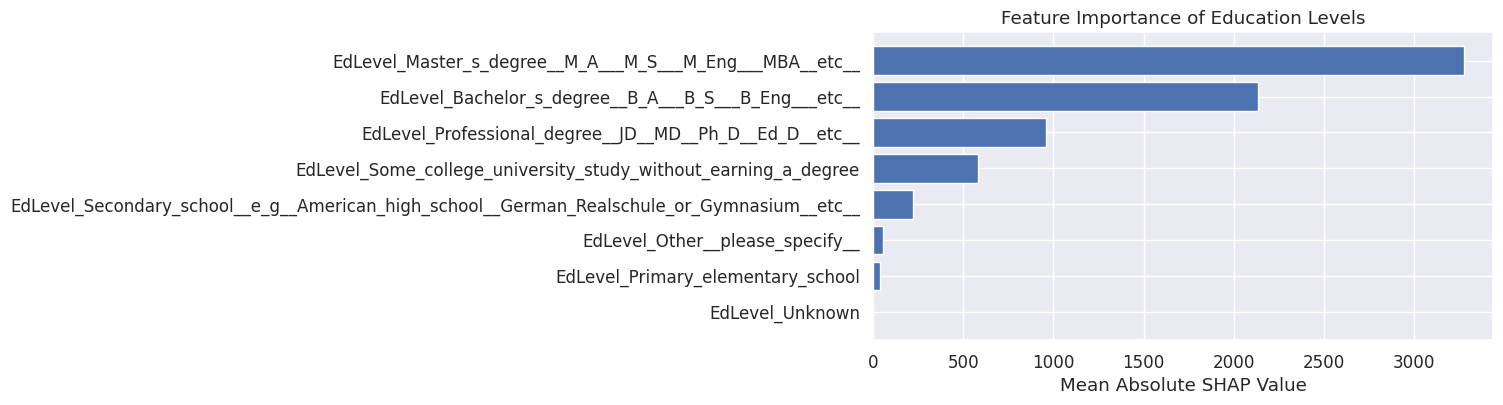

In [58]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Initialize SHAP explainer for LightGBM
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Create a DataFrame of mean absolute SHAP values
shap_df = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanAbsSHAP": np.abs(shap_values).mean(axis=0)
})

# Filter for education-related features
edu_shap = shap_df[shap_df["Feature"].str.startswith("EdLevel_")]

# Sort by importance
edu_shap = edu_shap.sort_values(by="MeanAbsSHAP", ascending=False)

# Display the result
print("SHAP values for education features:")
display(edu_shap)

# Optional: plot a bar chart
plt.figure(figsize=(8,4))
plt.barh(edu_shap["Feature"], edu_shap["MeanAbsSHAP"])
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Feature Importance of Education Levels")
plt.gca().invert_yaxis()
plt.show()


In [70]:
import pandas as pd

# Base profile for prediction
profile = {
    "WorkExp": 1,                # professional experience
    "YearsCode": 1,              # coding experience
    "AISelect": "Yes__I_use_AI_tools_weekly",  # weekly AI usage
    "LanguageHaveWorkedWith": ["Python"]      # programming languages
}

# Countries and education levels to test
countries = ["United_States_of_America", "Germany", "Japan", "Canada", "Italy"]
education_levels = [
    "EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng___etc__",
    "EdLevel_Master_s_degree__M_A___M_S___M_Eng___MBA___etc__",
    "EdLevel_Professional_degree__JD__MD__Ph_D__EdD___etc__"
]

# Prepare DataFrame for predictions
predictions = []

for country in countries:
    for edu in education_levels:
        row = {}
        # Numerical features
        row["WorkExp"] = profile["WorkExp"]
        row["YearsCode"] = profile["YearsCode"]

        # Initialize all columns to 0
        for col in X_train.columns:
            row[col] = 0

        # Set country column
        country_col = f"Country_{country}"
        if country_col in row:
            row[country_col] = 1

        # Set education column
        if edu in row:
            row[edu] = 1

        # Set AI usage column
        ai_col = f"AISelect_{profile['AISelect']}"
        if ai_col in row:
            row[ai_col] = 1

        # Set programming languages
        for lang in profile["LanguageHaveWorkedWith"]:
            if lang in row:
                row[lang] = 1

        # Append row to list
        predictions.append(row)

# Convert to DataFrame
pred_df = pd.DataFrame(predictions)

# Align columns with training data
pred_df = pred_df[X_train.columns]

# Predict salaries
predicted_salaries = lgb_model.predict(pred_df)

# Create results table
results = []
for i, country in enumerate(countries):
    for j, edu in enumerate(education_levels):
        index = i*len(education_levels) + j
        results.append({
            "Country": country,
            "Education": edu,
            "PredictedSalary": predicted_salaries[index]
        })

result_df = pd.DataFrame(results)
print(result_df)


                     Country  \
0   United_States_of_America   
1   United_States_of_America   
2   United_States_of_America   
3                    Germany   
4                    Germany   
5                    Germany   
6                      Japan   
7                      Japan   
8                      Japan   
9                     Canada   
10                    Canada   
11                    Canada   
12                     Italy   
13                     Italy   
14                     Italy   

                                            Education  PredictedSalary  
0   EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng__...     71563.388811  
1   EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...     33905.205670  
2   EdLevel_Professional_degree__JD__MD__Ph_D__EdD...     33905.205670  
3   EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng__...     38615.279806  
4   EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...     15946.634110  
5   EdLevel_Professional_degree__JD__MD__Ph_D__Ed

In [71]:
import pandas as pd

# ----------------------------------------------------
# Create a pivot table with:
#   - Rows: Education levels
#   - Columns: Countries
#   - Values: Predicted Salary
# This will show a table with education on rows and countries as columns.
# ----------------------------------------------------

pivot_df = result_df.pivot(
    index="Education",
    columns="Country",
    values="PredictedSalary"
)

# Optional: sort rows to have Bachelor → Master → PhD
edu_order = [
    "EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng___etc__",
    "EdLevel_Master_s_degree__M_A___M_S___M_Eng___MBA___etc__",
    "EdLevel_Professional_degree__JD__MD__Ph_D__EdD___etc__"
]

pivot_df = pivot_df.loc[edu_order]

# Round for readability
pivot_df = pivot_df.round(0).astype(int)

# Display final table (Jupyter automatically applies alternating row colors)
print("Predicted Salary by Education Level and Country:")
display(pivot_df)


Predicted Salary by Education Level and Country:


Country,Canada,Germany,Italy,Japan,United_States_of_America
Education,,,,,
EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng___etc__,46870,38615,24684,25990,71563
EdLevel_Master_s_degree__M_A___M_S___M_Eng___MBA___etc__,23260,15947,5101,5562,33905
EdLevel_Professional_degree__JD__MD__Ph_D__EdD___etc__,23260,15947,5101,5562,33905
